Nama : Nabilah Sofieyanti

Proyek Pertama : Predictive Analytics

Machine Learning Terapan

## Import Library

Langkah pertama adalah mengimport library-library yang dibutuhkan dalam pengerjaan proyek ini.

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


## Load Dataset

Data yang digunakan ialah data rumah di kota Jakarta. Data sebagai berikut :

-Terdapat 1010 records atau jumlah pengamatan dalam dataset

-Terdapat 8 kolom yaitu NO, NAMA RUMAH, HARGA, LB dalam m^2 (Luas Bangunan), LT dalam m^2 (Luas Tanah), KT (Jumlah Kamar Tidur), KM (Jumlah Kamar Mandi), dan GRS (Jumlah Kapasitas mobil dalam garasi).

In [180]:
harga_rumah = pd.read_excel('DATA RUMAH.xlsx')
harga_rumah

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


## Data Understanding

### Deskripsi variabel

Berdasarkan informasi dari sumber data berikut deskripsi variabel dari dataset tersebut:

-Harga dalam rupiah yang merupakan fitur target

-LB: Luas Bangunan dalam m^2

-LT: Luas Tanah dalam m^2

-KT: Jumlah kamar tidur

-KM: Jumlah kamar mandi

-GRS: Jumlah kapasitas mobil dalam garasi

Selanjutnya, melihat bagaimana deskripsi data secara statistik serta tipe data sebagai berikut.

In [181]:
harga_rumah.describe()

,NO,HARGA,LB,LT,KT,KM,GRS
count,1010.000000,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,505.500000,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,291.706188,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,253.250000,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,505.500000,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,757.750000,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,1010.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [182]:
harga_rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


Hasil fungsi info() menunjukan bahwa tipe seluruh variabel adalah integer, kecuali NAMA RUMAH yaitu string/object. Serta tidak ada missing value.


## Outliers

Selanjutnya, mengecek apakah terdapat data outliers dengan melihat sebaran data menggunakan boxplot.

### Fitur Luas Bangunan

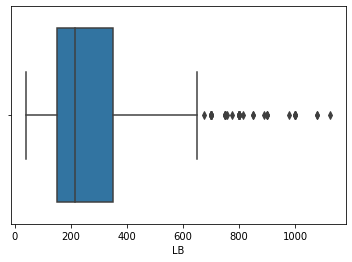

In [183]:
sns.boxplot(x=harga_rumah['LB'])

### Fitur Luas Tanah

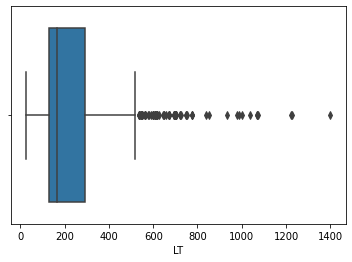

In [184]:
sns.boxplot(x=harga_rumah['LT'])

### Fitur kamar tidur

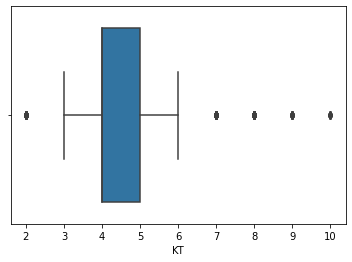

In [185]:
sns.boxplot(x=harga_rumah['KT'])

### Fitur kamar mandi

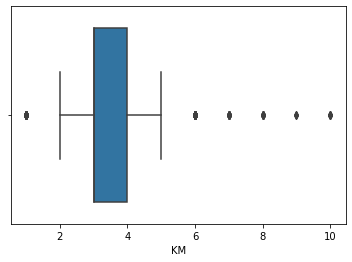

In [186]:
sns.boxplot(x=harga_rumah['KM'])

### Fitur kapasitas mobil dalam garasi

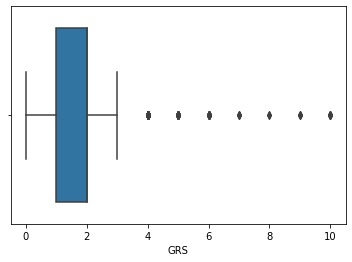

In [187]:
sns.boxplot(x=harga_rumah['GRS'])

Dari plot-plot di atas menunjukan bahwa pada fitur-fitur terdapat outliers yang akan ditangani pada tahap data preparation (data cleaning)

## Numerical Features

Karena pada dataset fitur yang akan digunakan hanyalah fitur numerik maka hanya dilakukan univariate dan multivariate analysis pada numerical features.

### Univariate Analysis

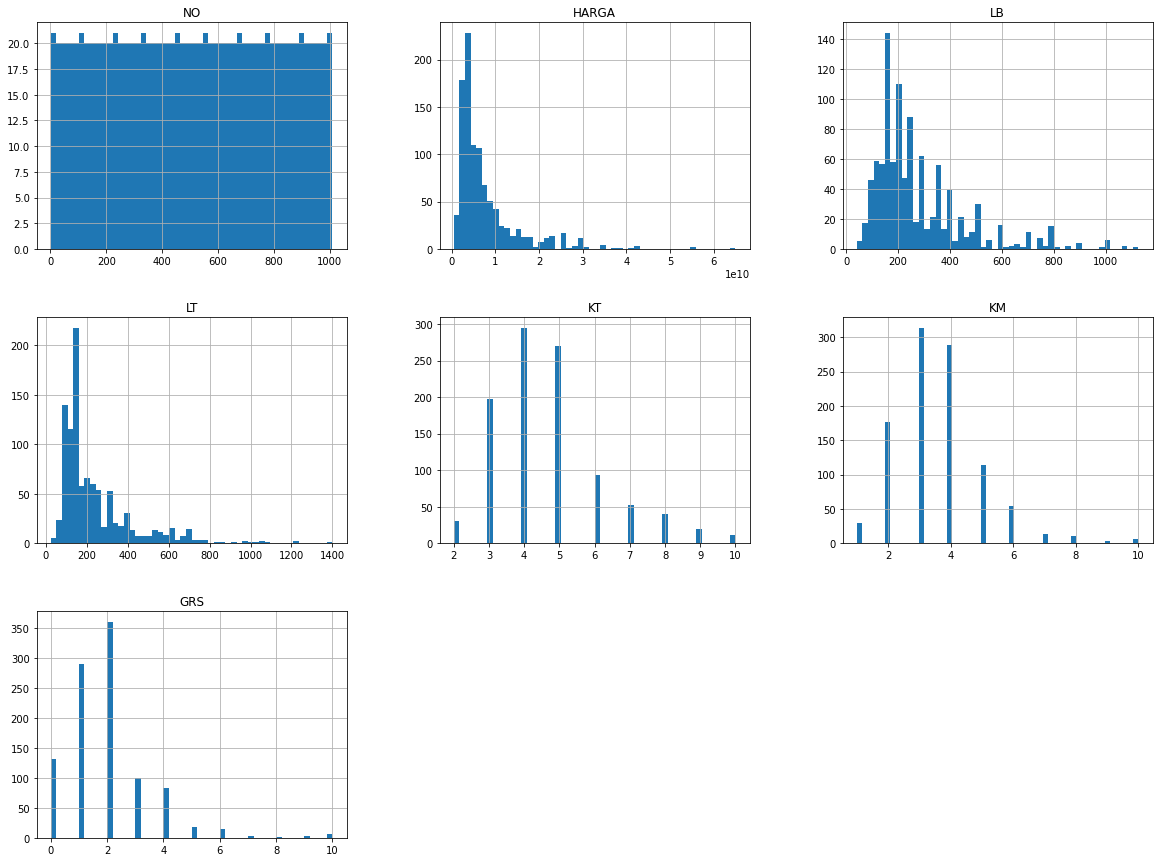

In [188]:
harga_rumah.hist(bins=50, figsize=(20,15))
plt.show()

Dari hasil di atas khususnya plot harga terlihat bahwa distribusi harga miring ke kanan atau disebut reight skewed. 

### Multivariate Analysis

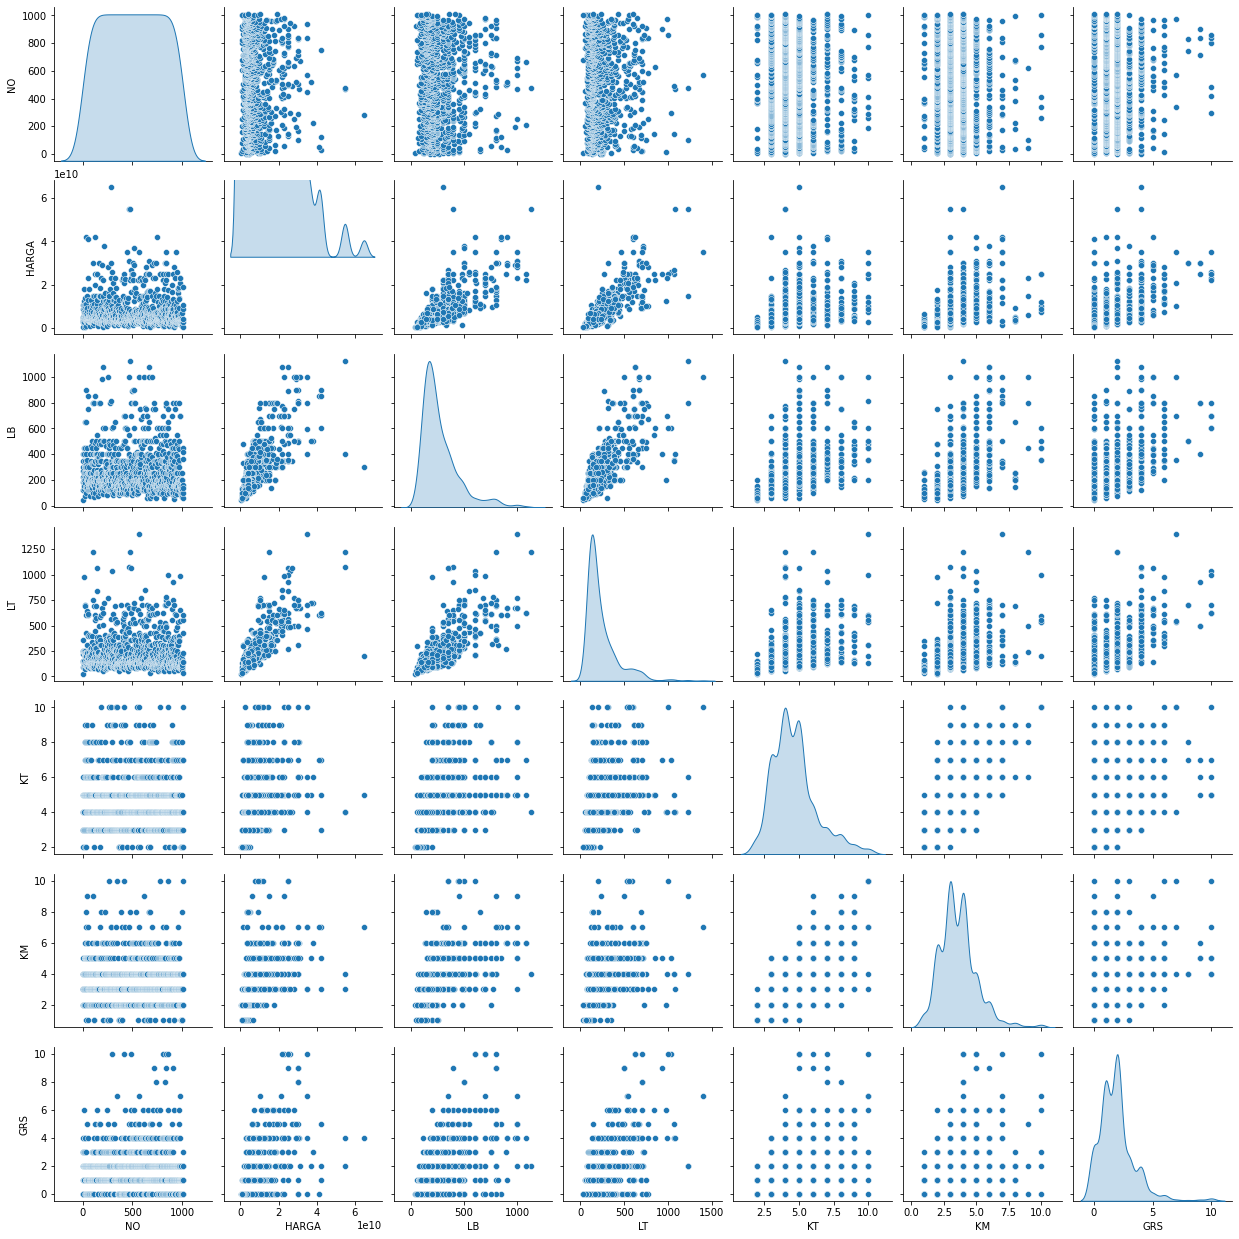

In [189]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(harga_rumah, diag_kind = 'kde')

Dari pairplot diatas, terlihat terbentuk pola adanya hubungan korelasi antara harga dengan Luas tanah dan harga dengan Luas Bangunan.

### Evaluasi skor korelasi

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

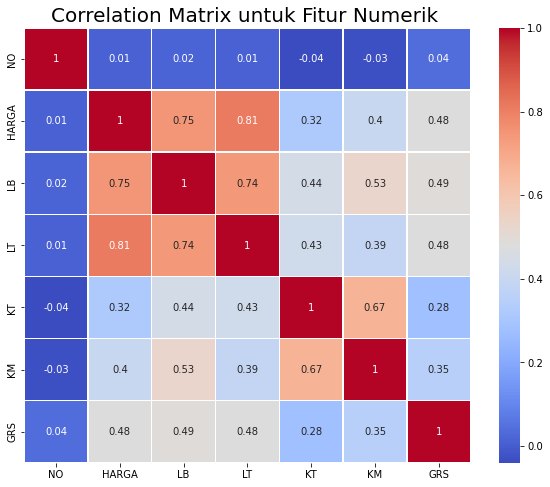

In [190]:
plt.figure(figsize=(10, 8))
correlation_matrix = harga_rumah.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Hasil matriks korelasi di atas, terlihat korelasi seluruh variabel terhadap fitur harga berkorelasi positif namun untuk KT, KM, dan GRS berkorelasi lemah sedangkan LB dan LT berkorelasi cukup tinggi.

## Data Preparation

### Data Cleaning


Untuk kolom NO dan NAMA RUMAH sekiranya mungkin kurang diperlukan sehingga dihapus dari dataset.

In [191]:
harga_rumah = harga_rumah.drop(columns = ['NO','NAMA RUMAH'])
harga_rumah

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3
...,...,...,...,...,...,...
1005,9000000000,450,550,10,10,3
1006,4000000000,160,140,4,3,2
1007,4000000000,139,230,4,4,1
1008,19000000000,360,606,7,4,0


Sehingga, untuk ukuran dataset menjadi 6 kolom.

In [192]:
harga_rumah.shape

(1010, 6)

Dilanjut menangani outliers dengan teknik IQR Method.

In [193]:
Q1 = harga_rumah.quantile(0.25)
Q3 = harga_rumah.quantile(0.75)
IQR=Q3-Q1
harga_rumah=harga_rumah[~((harga_rumah<(Q1-1.5*IQR))|(harga_rumah>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah drop outliers
harga_rumah.shape

(695, 6)

### Data Transform

Untuk variabel HARGA ditransformasi menjadi satuan milyar agar mudah dipahami.

In [194]:
harga_rumah['HARGA'] = harga_rumah['HARGA']/1000000000
harga_rumah

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,HARGA,LB,LT,KT,KM,GRS
0,3.80,220,220,3,3,0
1,4.60,180,137,4,3,2
4,9.00,400,355,6,5,3
5,4.97,300,154,5,3,3
6,2.60,120,150,3,2,1
...,...,...,...,...,...,...
1001,4.50,128,90,3,3,1
1002,7.00,150,110,4,3,1
1004,2.60,100,140,3,2,1
1006,4.00,160,140,4,3,2


### Train test split

Membagi dataset menjadi data train dan data test sbelum membuat model dengan ukuran data test 20% dari jumlah dataset dengan random state=123

In [195]:
X = harga_rumah.drop(["HARGA"],axis =1)
y = harga_rumah["HARGA"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [196]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 695
Total # of sample in train dataset: 556
Total # of sample in test dataset: 139


### Standarisasi

Dilakukan standarisasi untuk membuat fitur data menjadi bentuk yang mudah diolah.

In [197]:
numerical_features = ['LB', 'LT', 'KM', 'KT', 'GRS']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,LB,LT,KM,KT,GRS
452,-1.224249,-1.422989,-1.376306,-1.270298,-1.857082
687,1.125669,0.614996,0.851426,-0.190350,1.761625
768,-0.858706,-0.883522,-1.376306,-0.190350,0.555389
164,1.647873,-0.535866,0.851426,0.889597,1.761625
242,-1.015368,-0.392008,-1.376306,-0.190350,-0.650847


In [198]:
#cek nilai mead dan sd setelah standarisasi
X_train[numerical_features].describe().round(3)

,LB,LT,KM,KT,GRS
count,556.000,556.000,556.000,556.000,556.000
mean,-0.000,-0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001
min,-1.684,-1.447,-1.376,-1.270,-1.857
25%,-0.702,-0.698,-0.262,-1.270,-0.651
50%,-0.180,-0.356,-0.262,-0.190,0.555
75%,0.342,0.555,0.851,0.890,0.555
max,4.478,3.600,1.965,1.970,1.762


Untuk melihat hasil standarisasi, bisa dilihat dengan hasil mean yaitu 0 dan standar deviasi yaitu 1.

## Modelling

### KNN

Algoritma ini menggunakan 'kesamaan fitur' untuk memprediksi nilai dari data yang baru.

In [199]:
#dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [200]:
#KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random forest

Algoritma ini cocok digunakan untuk masalah klasifikasi dan regresi. Metrik yang digunakan ialah MSE.

In [201]:
#Bagging Algorithm
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)    

### Boosting Algorithm

Algoritma ini membangun model dari data latih secara berurutan atau dalam proses yang iteratif. Bertujuan untuk meningkatkan akurasi.

In [202]:
#Boosting Algorithm
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi model

Proses scaling baru dilakukan pada data test.

In [203]:
#Scalling data uji
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Selajutnya mengevaluasi ketiga model/algoritma tadi dengan metrik MSE. 

In [204]:
#Evaluasi ketiga model dengan metrik MSE
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.00243,0.003014
RF,0.000471,0.002564
Boosting,0.002212,0.003043


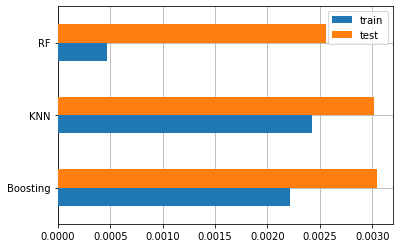

In [205]:
#Plot metrik dengan bar chart
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dilihat dari plot diatas untuk error pada data test ketiganya hampir sama namun pada data train, model RF memiliki error paling kecil.

## Prediksi

Kemudian dilakukan prediksi, ternyata benar dari ketiga algoritma/model tersebut hasil yang paling mendekati ialah model Random Forest.

In [206]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
184,7.15,5.4,6.6,5.2


## Kesimpulan

Berdasarkan problem statement yang ditentukan sebelumnya, maka dapat diketahui bahwa fitur yang paling berpengaruh dalam prediksi harga rumah ialah luas tanah dan luas bangunan. Kedua fitur tersebut berkorelasi paling tinggi terhadap harga rumah. Serta model sistem prediksi terbaik adalah model Random Forest karena memiliki nilai error terkecil dan hasil prediksi mendekati nilai aslinya.  